<a href="https://colab.research.google.com/github/redom13/ML/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the dependencies

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Data (preparing and loading)

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Train Test Split

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Plotting train and test data

In [5]:
def plot_predictions(train_data=X_train,
                     test_data=X_test,
                     train_label=y_train,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(12,8))
  plt.scatter(train_data,train_label,c='b',s=4,label='Training Data')
  plt.scatter(test_data,test_label,c='c',s=4,label='Test Data')
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  plt.xlabel('Feature')
  plt.ylabel('Target')
  plt.legend( prop={'size':14})

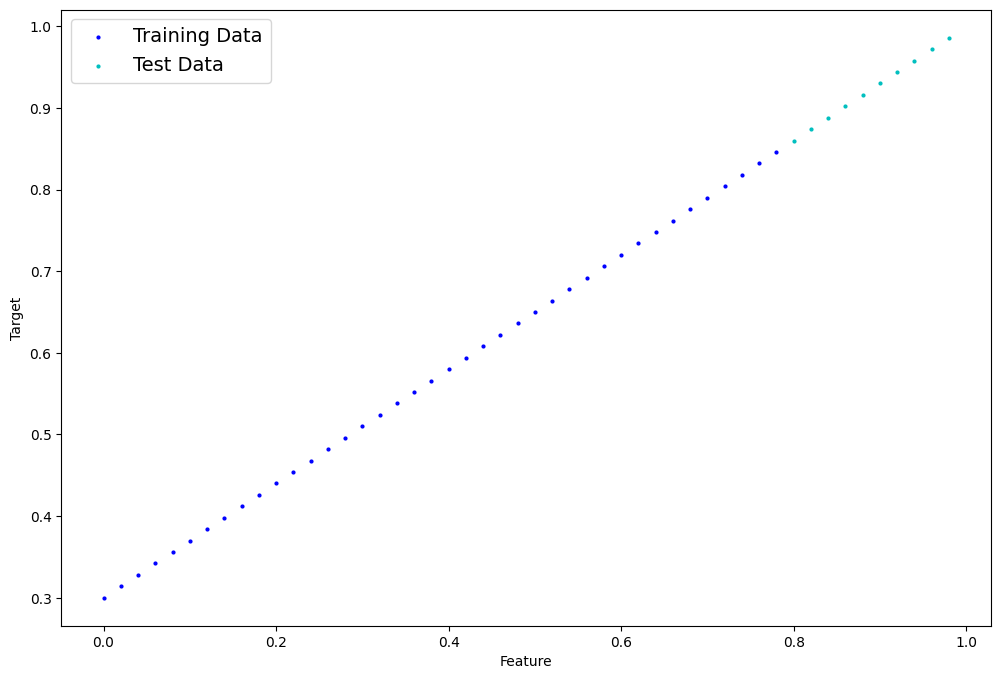

In [6]:
plot_predictions()

# Build Model

In [10]:
class LinearRegressionModel(nn.Module): # Inherites nn.Module class
  def __init__(self): # Like the constructor
    super().__init__() # Calling the constructor for parent class
    self.weights=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True) # Can we update this value with grad descent
    self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

  # Forward defines the computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias


# Checking the contents of a Pytorch Model

In [11]:
torch.manual_seed(12)

model_0=LinearRegressionModel()

print(list(model_0.parameters()))

[Parameter containing:
tensor([-0.2138], requires_grad=True), Parameter containing:
tensor([-1.3780], requires_grad=True)]


In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.2138])), ('bias', tensor([-1.3780]))])

# Making prediction using ```torch.inference_mode()```





In [13]:
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[-1.5490],
        [-1.5533],
        [-1.5576],
        [-1.5618],
        [-1.5661],
        [-1.5704],
        [-1.5747],
        [-1.5789],
        [-1.5832],
        [-1.5875]])

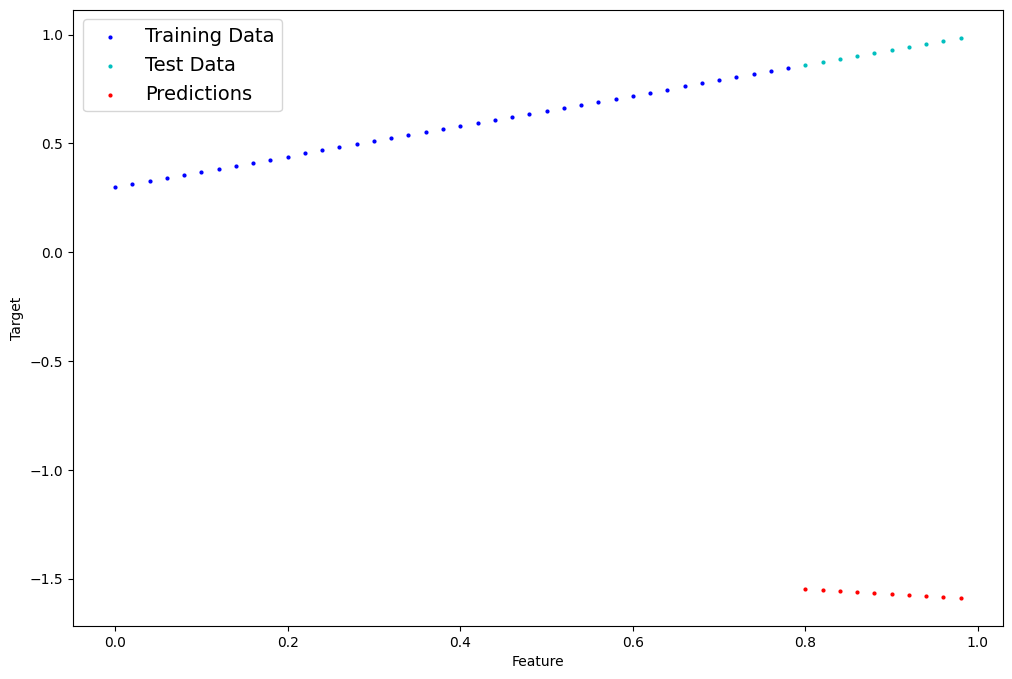

In [14]:
plot_predictions(predictions=y_preds)

# Train Model

Creating a loss function and optimizer in Pytorch

In [16]:
loss_fn=nn.L1Loss() # L1Loss --> Mean Absolute Error(MAE)
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01) # SGD --> Stochastic Gradient Descent

Optimizer Loop

In [18]:
torch.manual_seed(12)

epochs=500

train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
  ### Training

  # Put the model in training mode
  model_0.train()

  # Forward propagation (uses the forward method implicitly)
  y_pred=model_0(X_train)

  # Calculate the loss
  loss=loss_fn(y_pred,y_train)

  # Zero grad to the optimizer
  optimizer.zero_grad()

  # Loss Backwards
  loss.backward()

  # Progress the Optimizer
  optimizer.step()


  ### Testing

  # Put the model in evaluation mode
  model_0.eval()

  with torch.inference_mode():
    # Forward pass on test data
    test_pred = model_0(X_test)

    # Calculate loss on test data
    test_loss = loss_fn(test_pred,y_test.type(torch.float))

    # Print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.8822507858276367 | MAE Test Loss: 1.1306867599487305 
Epoch: 10 | MAE Train Loss: 0.7670409083366394 | MAE Test Loss: 0.9959767460823059 
Epoch: 20 | MAE Train Loss: 0.6518309116363525 | MAE Test Loss: 0.8612667322158813 
Epoch: 30 | MAE Train Loss: 0.5366209149360657 | MAE Test Loss: 0.7265567779541016 
Epoch: 40 | MAE Train Loss: 0.4214109480381012 | MAE Test Loss: 0.5918468236923218 
Epoch: 50 | MAE Train Loss: 0.3062010407447815 | MAE Test Loss: 0.45713692903518677 
Epoch: 60 | MAE Train Loss: 0.19099099934101105 | MAE Test Loss: 0.322426974773407 
Epoch: 70 | MAE Train Loss: 0.08029498159885406 | MAE Test Loss: 0.1917971670627594 
Epoch: 80 | MAE Train Loss: 0.045205287635326385 | MAE Test Loss: 0.1215946301817894 
Epoch: 90 | MAE Train Loss: 0.03887280821800232 | MAE Test Loss: 0.09516765177249908 
Epoch: 100 | MAE Train Loss: 0.035264354199171066 | MAE Test Loss: 0.08279164135456085 
Epoch: 110 | MAE Train Loss: 0.03180491551756859 | MAE Test Loss: 0

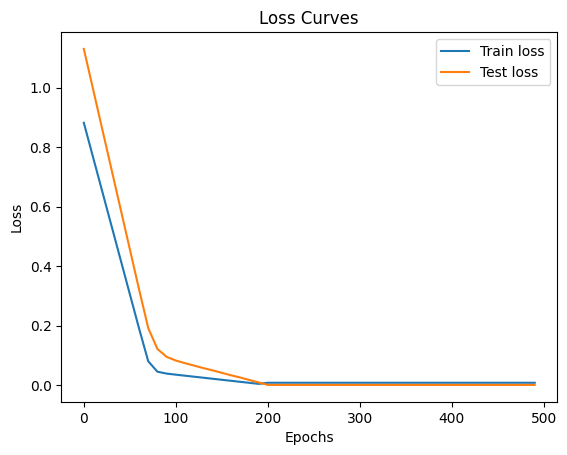

In [21]:
# Plot the loss curves
plt.plot(epoch_count,train_loss_values,label='Train loss')
plt.plot(epoch_count,test_loss_values,label='Test loss')
plt.title("Loss Curves")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [22]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6908])), ('bias', tensor([0.2955]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# Making Predictions with a trained Pytorch Model(inference)

In [23]:
# Take the model in evaluation mode
model_0.eval()

with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.8481],
        [0.8620],
        [0.8758],
        [0.8896],
        [0.9034],
        [0.9172],
        [0.9310],
        [0.9448],
        [0.9587],
        [0.9725]])

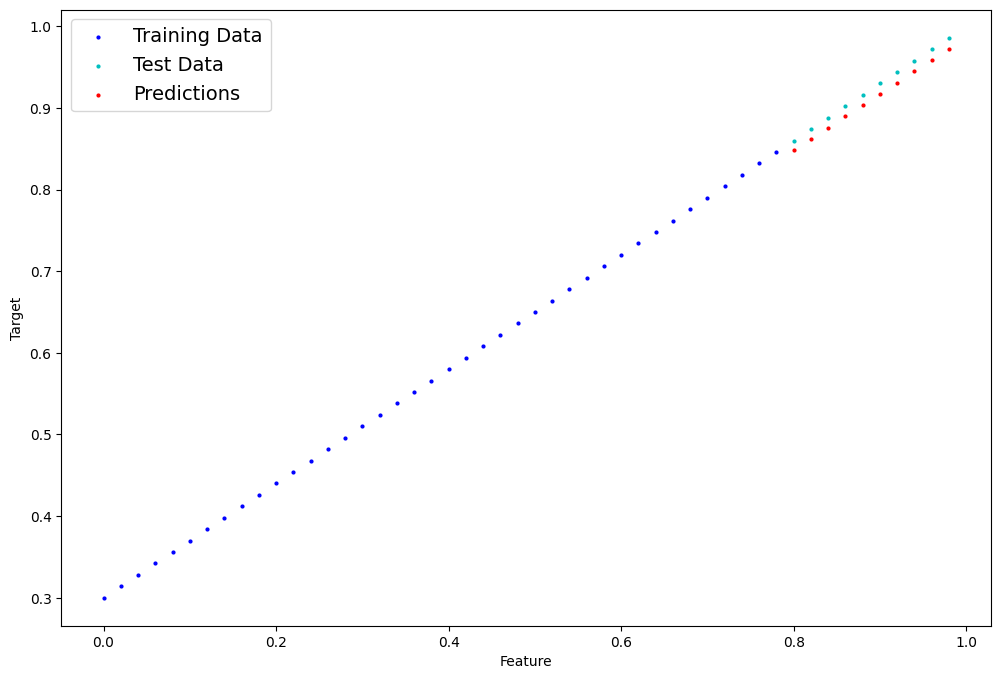

In [24]:
plot_predictions(predictions=y_preds)